In [211]:
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

### Modelos y herrmientas

In [1]:
#Herramientas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Datos

In [2]:
datos = pd.read_table('breast-cancer.data', sep=',', header=None,
                     names=['clase', 'edad', 'menopausia', 'tamaño_tumor', 'inv_nodos',
                            'nodo_caps','deg-malig', 'pecho', 'pecho_c', 'irradiat'])
datos

,clase,edad,menopausia,tamaño_tumor,inv_nodos,nodo_caps,deg-malig,pecho,pecho_c,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


clase
no-recurrence-events    201
recurrence-events        85
dtype: int64

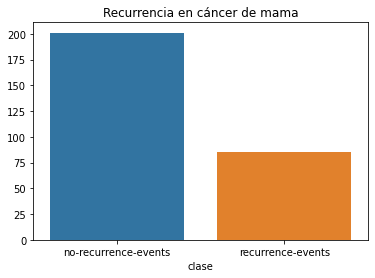

In [3]:
#Graficar los casos de recurrencia y no recurrencia 
recurr = datos.groupby('clase').size()
sns.barplot(x = recurr.index, y = recurr.values)
plt.title("Recurrencia en cáncer de mama")
plt.savefig('recurrencia.png')
recurr

### Preprocesamiento de datos

In [4]:
#Etiquetar con 0 a la no recurrencia y 1 a la recurrencia
datos=datos.replace({"recurrence-events": 1, "no-recurrence-events": 0})
datos

,clase,edad,menopausia,tamaño_tumor,inv_nodos,nodo_caps,deg-malig,pecho,pecho_c,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,1,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [5]:
le = preprocessing.LabelEncoder()
datos['edad']= le.fit_transform(datos['edad']) 
datos['menopausia']= le.fit_transform(datos['menopausia'])
datos['tamaño_tumor']= le.fit_transform(datos['tamaño_tumor'])
datos['inv_nodos']= le.fit_transform(datos['inv_nodos']) 
datos['nodo_caps']= le.fit_transform(datos['nodo_caps']) 
datos['deg-malig']= le.fit_transform(datos['deg-malig']) 
datos['pecho']= le.fit_transform(datos['pecho']) 
datos['pecho_c']= le.fit_transform(datos['pecho_c']) 
datos['irradiat']= le.fit_transform(datos['irradiat']) 

In [6]:
#definir x y y 
x = datos.iloc[:,1:9].values
y = datos.iloc[:,0].values
#dividir los datos
xTrain,xTest,yTrain,yTest = train_test_split(x, y, test_size=0.30,random_state=0)
#estandarizar las escalas 
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.fit_transform(xTest)

# kNN

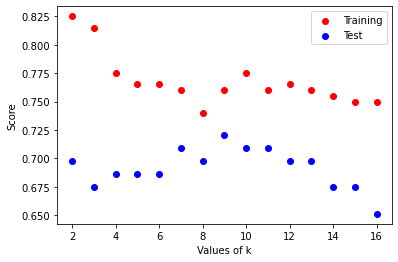

In [44]:
#entrenar al modelo 
K = list()
training = list()
test = list()
scores = {}
  
for k in range(2, 17):
    clsf = KNeighborsClassifier(n_neighbors = k)
    clsf.fit(xTrain, yTrain)
    training_score = clsf.score(xTrain, yTrain)
    test_score = clsf.score(xTest, yTest)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

#graficar los puntajes de cada valor de k
plt.scatter(K, training, c='r', label='Training')
plt.scatter(K, test, c='b', label='Test')
plt.xlabel('Values of k')
plt.ylabel('Score')
plt.legend(loc='upper right')
#plt.show()
plt.savefig('ValuesOfK.png')

In [9]:
#Modelo con k=9
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p =2)
classifier.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=9)

In [10]:
#predicciones
y_pred = classifier.predict(xTest)
y_pred_prob = classifier.predict_proba(xTest)
n_prob = [0 for _ in range(len(yTest))] #probabilidad nula 
y_pred_prob = y_pred_prob[:, 1] #Probabilidades para resultado positivo

#reporte
report = classification_report(y_pred,yTest)
print(report)
score = accuracy_score(y_pred, yTest)
print('accuracy_score',score)

              precision    recall  f1-score   support

           0       0.96      0.71      0.82        75
           1       0.29      0.82      0.43        11

    accuracy                           0.72        86
   macro avg       0.63      0.76      0.62        86
weighted avg       0.88      0.72      0.77        86

accuracy_score 0.7209302325581395


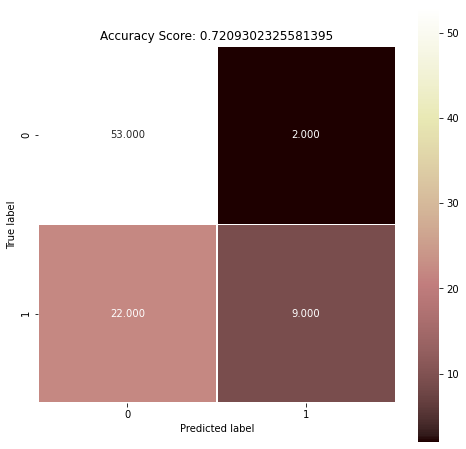

In [11]:
#Crear matriz de confusion 
mc = confusion_matrix(yTest, y_pred)
#graficar matriz de confusión
plt.figure(figsize=(8,8))
sns.heatmap(mc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'pink')
plt.ylabel('True label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size = 12)
#plt.show()
plt.savefig('mcKNN.png')

No Skill: ROC AUC=0.500
Model: ROC AUC=0.701


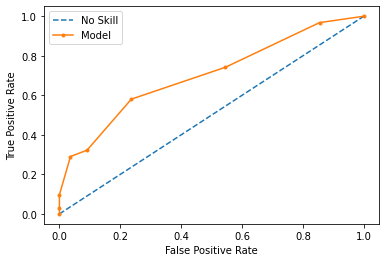

In [45]:
#curva ROC 
n_auc = roc_auc_score(yTest, n_prob)
y_auc = roc_auc_score(yTest, y_pred_prob)
print('No Skill: ROC AUC=%.3f' % (n_auc))
print('Model: ROC AUC=%.3f' % (y_auc))
n_fpr, n_tpr, _ = roc_curve(yTest, n_prob)
y_fpr, y_tpr, _ = roc_curve(yTest, y_pred_prob)
#graficar la curva roc del modelo
plt.plot(n_fpr, n_tpr, linestyle='--', label='No Skill')
plt.plot(y_fpr, y_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.show()
plt.savefig('RocKNN.png')

## SVM

In [13]:
#modelo
svm = SVC(kernel= 'linear', random_state=0, C=0.1, probability=True)
svm.fit(xTrain, yTrain)

SVC(C=0.1, kernel='linear', probability=True, random_state=0)

In [14]:
#predicciones
y_pred1 = svm.predict(xTest)
y_pred_prob1 = svm.predict_proba(xTest)
n_prob = [0 for _ in range(len(yTest))] #probabilidad nula 
y_pred_prob1 = y_pred_prob1[:, 1] #Probabilidades para resultado positivo

#reporte
report1 = classification_report(y_pred1,yTest)
print(report1)
score = accuracy_score(y_pred1, yTest)
print('accuracy_score',score)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        70
           1       0.35      0.69      0.47        16

    accuracy                           0.71        86
   macro avg       0.63      0.70      0.63        86
weighted avg       0.81      0.71      0.74        86

accuracy_score 0.7093023255813954


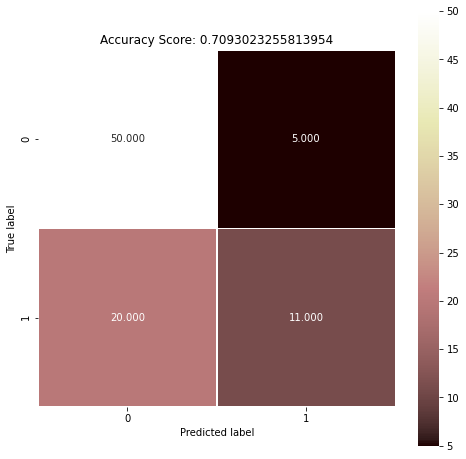

In [15]:
#crear matriz de confusion
cm = confusion_matrix(yTest, y_pred1)
#graficar matriz de confusión
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'pink')
plt.ylabel('True label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size = 12)
#plt.show()
plt.savefig('mcSVM.png')

No Skill: ROC AUC=0.500
Model: ROC AUC=0.672


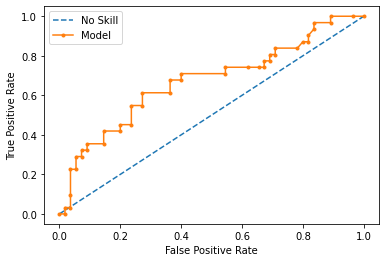

In [46]:
#curva ROC 
n_auc1 = roc_auc_score(yTest, n_prob)
y_auc1 = roc_auc_score(yTest, y_pred_prob1)
print('No Skill: ROC AUC=%.3f' % (n_auc1))
print('Model: ROC AUC=%.3f' % (y_auc1))
n_fpr, n_tpr, _ = roc_curve(yTest, n_prob)
y_fpr, y_tpr, _ = roc_curve(yTest, y_pred_prob1)
#graficar la curva roc del modelo
plt.plot(n_fpr, n_tpr, linestyle='--', label='No Skill')
plt.plot(y_fpr, y_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.show()
plt.savefig('RocSVM.png')

## Logistic Regression

In [17]:
#modelo
lr = LogisticRegression()
lr.fit(xTrain, yTrain)

LogisticRegression()

In [18]:
#predicciones
y_pred2 = lr.predict(xTest)
y_pred_prob2 = lr.predict_proba(xTest)
n_prob = [0 for _ in range(len(yTest))] #probabilidad nula 
y_pred_prob2 = y_pred_prob2[:, 1] #Probabilidades para resultado positivo

#reporte
report2 = classification_report(y_pred1,yTest)
print(report2)
score = accuracy_score(y_pred2, yTest)
print('accuracy_score',score)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        70
           1       0.35      0.69      0.47        16

    accuracy                           0.71        86
   macro avg       0.63      0.70      0.63        86
weighted avg       0.81      0.71      0.74        86

accuracy_score 0.6976744186046512


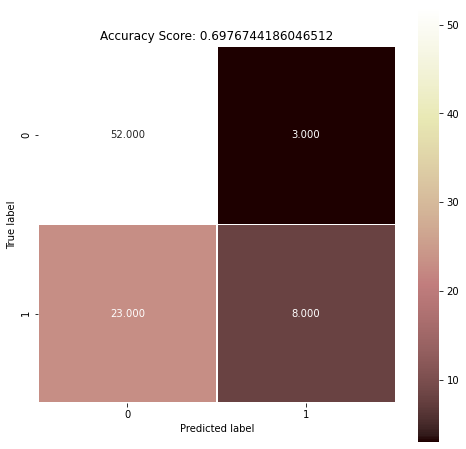

In [19]:
#crear matriz de confusión
cm = metrics.confusion_matrix(yTest, y_pred2)
#graficar cm 
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'pink');
plt.ylabel('True label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size = 12)
#plt.show()
plt.savefig('mcLR.png')

No Skill: ROC AUC=0.500
Model: ROC AUC=0.728


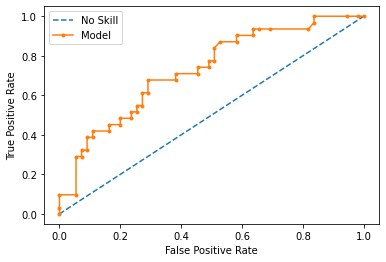

In [42]:
#curva ROC 
n_auc2 = roc_auc_score(yTest, n_prob)
y_auc2 = roc_auc_score(yTest, y_pred_prob2)
print('No Skill: ROC AUC=%.3f' % (n_auc2))
print('Model: ROC AUC=%.3f' % (y_auc2))
n_fpr, n_tpr, _ = roc_curve(yTest, n_prob)
y_fpr, y_tpr, _ = roc_curve(yTest, y_pred_prob2)
#graficar la curva roc del modelo
plt.plot(n_fpr, n_tpr, linestyle='--', label='No Skill')
plt.plot(y_fpr, y_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.show()
plt.savefig('RocLogisticRegr.png')

### Validación cruzada

kNN: 0.690000 (0.086023)
SVM: 0.760000 (0.109087)
LR: 0.730000 (0.124900)


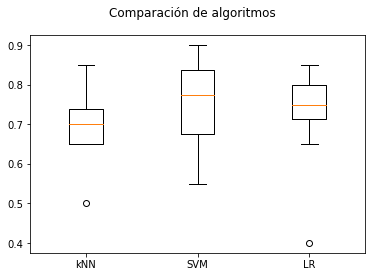

In [49]:
models = list()
models.append(('kNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
#evaluar cada modelo
results = list()
names = list()
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = model_selection.cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" %(name, cv_results.mean(), cv_results.std()))
    
#comparación de algoritmos 
fig = plt.figure()
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#plt.show()
plt.savefig('comparacion.png')